In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("data/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

               Date User            Message
0  2017/01/01 20:32   Î¨¥ÏßÄ  Ïù¥Í±∞Î≥¥Î©¥ Ïôú Í∞ìÏ∞ΩÏ†ïÏù∏ÏßÄ ÏïåÍ≤åÎêúÎã§
1  2017/01/01 21:40  Ïñ¥ÌîºÏπò                Ï∞ΩÏ†ïÌóå
2  2017/01/01 22:19  Ïñ¥ÌîºÏπò   ÎùºÏù¥Ïñ∏ÏùÄ ÎÇ¥ÏùºÎ∂ÄÌÑ∞ Ïó∞Íµ¨Ïã§ Ï∂úÍ∑º
3  2017/01/01 22:20   Î¨¥ÏßÄ          ÌååÌã∞ ÌïòÎäîÍ±∞ ÏïÑÎãò
4  2017/01/01 22:39  ÌîÑÎ°úÎèÑ                Ìó¨ÌååÌã∞
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162861 entries, 0 to 162860
Data columns (total 3 columns):
Date       162861 non-null object
User       162861 non-null object
Message    162861 non-null object
dtypes: object(3)
memory usage: 3.7+ MB
None


In [3]:
users = set(data["User"])
users

{'ÎÑ§Ïò§', 'ÎùºÏù¥Ïñ∏', 'Î¨¥ÏßÄ', 'Ïñ¥ÌîºÏπò', 'ÌäúÎ∏å', 'ÌîÑÎ°úÎèÑ'}

In [4]:
authors = data.groupby('User')
pprint(authors.groups)
print(type(authors.groups))

{'ÎÑ§Ïò§': Int64Index([   273,    274,    276,    277,    342,    374,    396,   3784,
              3785,   3787,
            ...
            157425, 157427, 158059, 158060, 158062, 161067, 161068, 161074,
            161075, 161080],
           dtype='int64', length=324),
 'ÎùºÏù¥Ïñ∏': Int64Index([     9,     14,     15,     18,     19,     24,     25,     26,
                30,     32,
            ...
            162840, 162843, 162844, 162845, 162846, 162849, 162850, 162852,
            162854, 162860],
           dtype='int64', length=39243),
 'Î¨¥ÏßÄ': Int64Index([     0,      3,      6,      8,     10,     11,     13,     16,
                17,     22,
            ...
            162815, 162816, 162820, 162822, 162830, 162834, 162836, 162839,
            162841, 162842],
           dtype='int64', length=47861),
 'Ïñ¥ÌîºÏπò': Int64Index([     1,      2,      5,      7,     12,     20,     21,     23,
                27,     28,
            ...
            162649, 162654, 162655

In [5]:
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'ÎÑ§Ïò§': [273, 274, 276, 277, 342, 374, 396, 3784, 3785, 3787, 3791, 3793, 3799, 3801, 3803, 3805, 3808, 3809, 3811, 3813, 3816, 3819, 3820, 3823, 3826, 3848, 3849, 3850, 3851, 3855, 3857, 3862, 3870, 3873, 3874, 3889, 3890, 3892, 3897, 3901, 3905, 3911, 3929, 3934, 3936, 3937, 3938, 3943, 3947, 4418, 4419, 4427, 4429, 4436, 4437, 4438, 4440, 4444, 4445, 4451, 4452, 4454, 4458, 4461, 4462, 4464, 4472, 4474, 4480, 4482, 4484, 4490, 4491, 4493, 4495, 4498, 4500, 4501, 4502, 4504, 4506, 4508, 4512, 4515, 4518, 4520, 4521, 4527, 4532, 4536, 4541, 4543, 15741, 32226, 32227, 32231, 32233, 32234, 32236, 32253, 32256, 32260, 32261, 32264, 32267, 42185, 42188, 42189, 42192, 42197, 42208, 42286, 42289, 42290, 42291, 42293, 45199, 45202, 45208, 45209, 45227, 45228, 48740, 48741, 48742, 48743, 48748, 49663, 49665, 49668, 49669, 49671, 49673, 49675, 49677, 49694, 49697, 49699, 49701, 49702, 49705, 84101, 84102, 84107, 84108, 84111, 84114, 84118, 84120, 85304, 93097, 93098, 93100, 93101, 106745, 1

In [6]:
user1_msg = [str(data["Message"][idx]) for idx in author2doc['ÎÑ§Ïò§']]
user1_msg

['Ïò§ ÌäúÎ∏åÏù¥ Îã§ ÎÅùÎÇúÍ±¥Í∞Ä',
 'Í∑∏ÎÇ† Îä¶Í≤å ÍπåÏßÄ ÎÜÄÍ≤†ÏßÄ',
 'Ï†ÄÎÖÅÎïåÍπåÏßÄ ÌôïÏã§Ìûà Í∞àÏàò ÏûàÏùÑÎìØ',
 'Î¨¥ÏßÄ Ïó¨Ï†ÑÌïú Ìå¨Îçî ÏÇ¨Îûë',
 'Ïñ¥ÌîºÏπòÎäî Î™áÏãúÏóê ÏôÄ',
 'Î®ºÏ†Ä Ï†êÏã¨Î®πÍ≥† ÏûàÏúºÎ©¥ Î∞îÎ°úÍ∞àÍ≤å',
 'Ï∂úÎ∞úÌñàÏäµÎãàÎãπ',
 'ÌäúÎ∏å ÏûêÏ∑® ÎùºÏù¥Ïñ∏ÏóêÍ≤åÎèÑ Î¨ºÏñ¥Î≥¥Í≥† ÌïôÍµê ÏÑ†Î∞∞Îì§ Ïó∞ÎùΩÎãøÎäî ÏÇ¨ÎûåÏûàÏúºÎ©¥ Î¨ºÏñ¥Î¥êÏÑú Ï£ºÎ≥Ä ÏãúÏÑ∏ÎÇò ÌïôÍµêÎã§ÎãàÍ∏∞ Ìé∏Ìïú Í≥≥ Î¨ºÏñ¥Î≥¥Î©¥ Ï¢ãÏùå',
 'Ïï†Îì§ ÎßéÏù¥ ÏÇ¨Îäî Í≥≥ÎèÑ Î¨ºÏñ¥Î≥¥Í≥† Í∑∏Î¶¨Í≥† ÏßëÏùÄ ÏïÑÏßÅÎèÑ ÏßÅÏ†ë Î∞úÌíàÌååÎäîÍ≤å ÏµúÍ≥†Ïù∏ÎìØ',
 'ÌïòÏßÄÎßå ÏûêÏ∑®Îäî ÏßÑÏßú Îèà ÎßéÏù¥ Íπ®ÏßÑÎã§ÎäîÍ±∞',
 'Í±∞Í∏∞ Í∏±ÏÇ¨Îûë ÏõîÏÑ∏ ÏãúÏÑ§ÏùÄ Ïûò Î™®Î•¥ÏßÄÎßå Í∏±ÏÇ¨Í∞Ä Ï†ÄÎ†¥ÌïòÏßÄ',
 'Í∏±ÏÇ¨ÏÇ¥Î©¥ÏÑú Ï£ºÎ≥ÄÏóê ÎèôÍ∏∞ÏûàÏúºÎ©¥ ÌïôÍµê Ï†ïÎ≥¥ÎèÑ Îçî Ïûò Ï£ºÏõåÎì£Í≥†',
 'Í∑ºÎç∞ Îòê ÎßâÏÉÅ 2ÌïôÍ∏∞ Î∂ÄÌÑ∞ ÏßëÍµ¨ÌïòÎäîÍ±¥ Ï¢ãÏùÄÎ∞©Ïù¥ ÏóÜÏùå',
 'Í∑∏ÎÉ• Î∂ÄÎèôÏÇ∞Í∞ÄÏÑú Î¨ºÏñ¥Î¥êÎèÑ ÏãúÏÑ∏ ÏïåÎ†§Ï§ÑÎìØ',
 'ÏûêÏ∑®ÌïòÍ≥† Ïã∂ÏúºÎ©¥',
 'ÎÇòÎäî Í∏±ÏÇ¨ Ï∂îÏ≤úÏù∏Îç∞',
 'ÎãπÏó∞Ìûà',
 'ÌïôÍµêÍ∑ºÏ≤ò',
 'ÏõÖÏõÖ',
 'ÏïÑÌïò Í∑∏Î

In [7]:
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

998


In [8]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

774
[('ÏõÖÏõÖ', 30),
 ('ÎßéÏù¥', 9),
 ('ÏûàÏùå', 7),
 ('Îã§Îì§', 7),
 ('Í∑ºÎç∞', 6),
 ('Ïûò', 5),
 ('Îçî', 5),
 ('Í∏±ÏÇ¨', 5),
 ('Î∞îÎ°ú', 5),
 ('ÎÑàÎ¨¥', 5)]


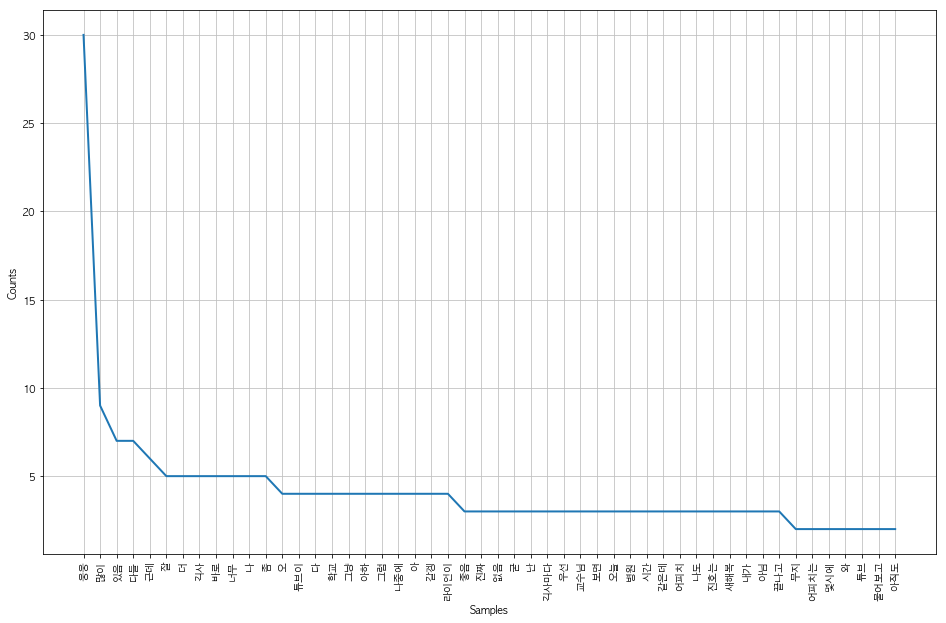

In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

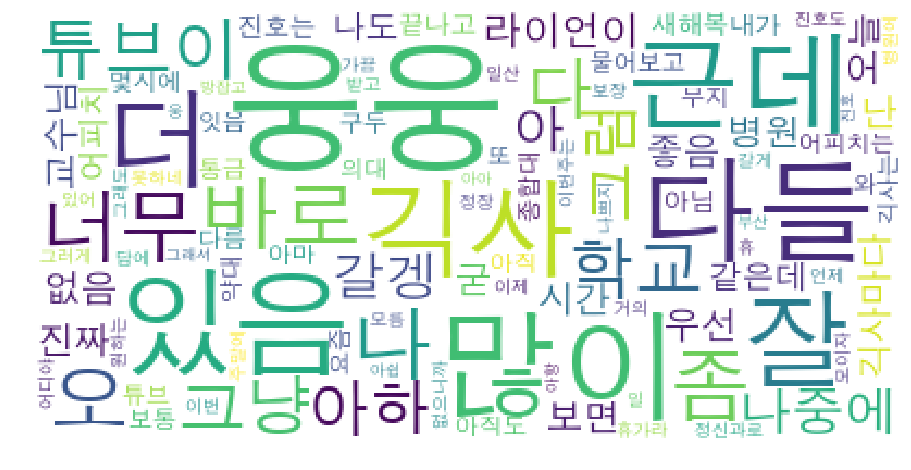

In [10]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

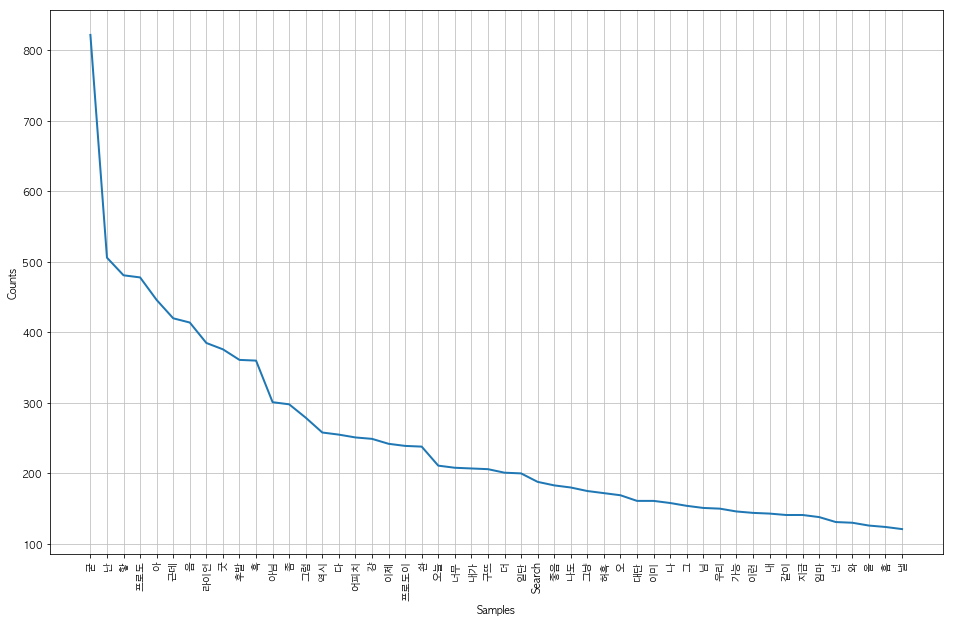

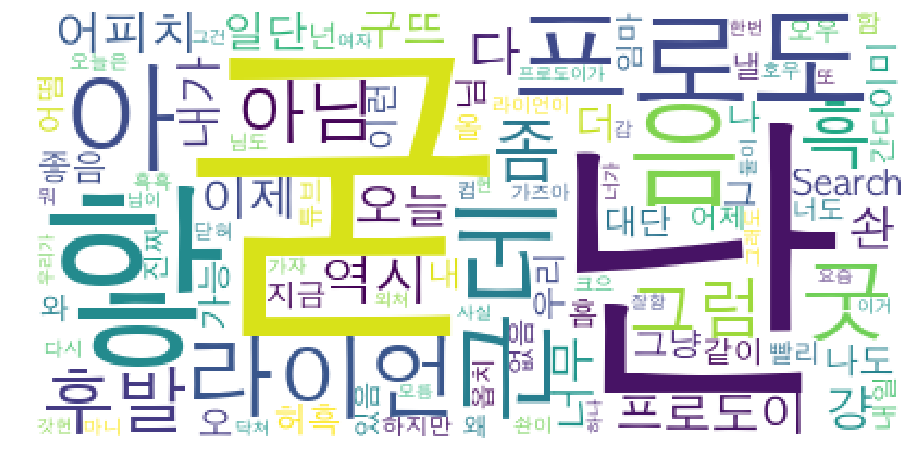

In [12]:
user_freq_analysis("Î¨¥ÏßÄ", data, author2doc)